# Wrangle and Analyze Data 

## Table of Contents
- [Introduction](#intro)
- [Gathering DATA](#gath)
- [Assessing DATA](#asess)
- [Cleaning DATA](#clean)
- [Analysing DATA](#ana)
- [Conclusion](#conclusion)

# --------------------------------------------------------------------------------------
<a id="intro"></a> 
## **Introduction**

Data wrangling is one of the most important steps in the data analysis process. By performing this step, the analysis becomes more credible and effective.
In this project we will try to apply the three steps of data wrangling, namely: gathering, assessing, cleaning. In this way we will perform an analysis on the resulting data.

Our wrangling process will be applied to a dataset from the WeRateDogs tiwtter account. This dataset will record the tweets on the dogs' ratings as well as the favorite breeds. 

We will use in this project the previous archive of this account and collect more data on the twitter API.

# --------------------------------------------------------------------------------------
<a id="gath"></a> 
## **Gathering DATA**

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests 
import os
import tweepy
from tweepy import OAuthHandler
import json
# from timeit import default_timer as timer
pd.set_option('display.max_colwidth', None)

### Downloading TSV file 

In [2]:
#creating a folder for getting the tsv data
folder_name = 'TSV'
if not os.path.exists(folder_name): #cheking if the folder name didn't exist in the directory
    os.makedirs(folder_name) #creat a TSV folder 

In [3]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url) #get the link and verify if it's work or not and get response from server
with open(os.path.join(folder_name, url.split('/')[-1]), mode='wb') as file: #open the tsv file 
    file.write(response.content) #write the content of the file got from the url

In [4]:
#read the tsv file downloaded from given url
predict = pd.read_csv('TSV/image-predictions.tsv', sep='\t') 
predict.head(1)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True


### Gathering data from twitter API 

In [5]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

### Gathering from JSON file 

In [6]:
import json 

In [7]:
#Reading the data from the tweet_json2.txt
all_data = [] #declaring a list for storing lines
with open('tweet_json2.txt', encoding='utf-8') as json_file:  
    for line in json_file:
        all_data.append(json.loads(line))

#Gathering some data from the tweet_json2 file
retweet_list = []
for each_dictionary in all_data:
        tweet_id = each_dictionary['id']
        favorite_count = each_dictionary['favorite_count']
        retweet_count = each_dictionary['retweet_count']
        retweet_list.append({'tweet_id': str(tweet_id),
                             'favorite_count': int(favorite_count),
                             'retweet_count': int(retweet_count),
                            })

In [8]:
#Creating a Data Frame basing on the list of elements gathering form tweet_json2 file
retweet_count = pd.DataFrame(retweet_list, columns = ['tweet_id', 'favorite_count','retweet_count'])
retweet_count.head(1)

,tweet_id,favorite_count,retweet_count
0,892420643555336193,36116,7693


In this step we get two data frame. First one is about prediction of dog breed, second one is about the retweet count and favorite count. 

For the retweet_count data frame we gather tweet_id for a previous merging between data frames if it's needing.


# --------------------------------------------------------------------------------------
<a id="asess"></a> 
## **Assessing DATA**

In this step we will discovering our gathered data and try to detect the data issues like: missing data issue, quality issue and tidiness issue.

We will use two way of assessing data: visualisation method and programming method.

In [9]:
df = pd.read_csv('twitter-archive-enhanced.csv')
df.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [11]:
for i in df.columns:
    print(i, sum(df[str(i)].duplicated()))  

tweet_id 0
in_reply_to_status_id 2278
in_reply_to_user_id 2324
timestamp 0
source 2352
text 0
retweeted_status_id 2174
retweeted_status_user_id 2330
retweeted_status_timestamp 2174
expanded_urls 137
rating_numerator 2316
rating_denominator 2338
name 1399
doggo 2354
floofer 2354
pupper 2354
puppo 2354


In [12]:
l_columns = ['rating_numerator', 'rating_denominator', 'doggo', 'floofer', 'pupper', 'puppo']
for i in l_columns:
    print(i, df[str(i)].unique())

rating_numerator [  13   12   14    5   17   11   10  420  666    6   15  182  960    0
   75    7   84    9   24    8    1   27    3    4  165 1776  204   50
   99   80   45   60   44  143  121   20   26    2  144   88]
rating_denominator [ 10   0  15  70   7  11 150 170  20  50  90  80  40 130 110  16 120   2]
doggo ['None' 'doggo']
floofer ['None' 'floofer']
pupper ['None' 'pupper']
puppo ['None' 'puppo']


In [13]:
for i in df.columns:
    print(i, sum(df[str(i)].isnull()))

tweet_id 0
in_reply_to_status_id 2278
in_reply_to_user_id 2278
timestamp 0
source 0
text 0
retweeted_status_id 2175
retweeted_status_user_id 2175
retweeted_status_timestamp 2175
expanded_urls 59
rating_numerator 0
rating_denominator 0
name 0
doggo 0
floofer 0
pupper 0
puppo 0


In [14]:
retweet_count.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2329 entries, 0 to 2328
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2329 non-null   object
 1   favorite_count  2329 non-null   int64 
 2   retweet_count   2329 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 54.7+ KB


In [15]:
for i in retweet_count.columns:
    print(i, sum(retweet_count[str(i)].duplicated()))

tweet_id 0
favorite_count 349
retweet_count 655


In [16]:
for i in retweet_count.columns:
    print(i, sum(retweet_count[str(i)].isnull()))

tweet_id 0
favorite_count 0
retweet_count 0


In [17]:
predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [18]:
for i in predict.columns:
    print(i, sum(predict[str(i)].duplicated()))

tweet_id 0
jpg_url 66
img_num 2071
p1 1697
p1_conf 69
p1_dog 2073
p2 1670
p2_conf 71
p2_dog 2073
p3 1667
p3_conf 69
p3_dog 2073


In [19]:
for i in predict.columns:
    print(i, sum(predict[str(i)].isnull()))

tweet_id 0
jpg_url 0
img_num 0
p1 0
p1_conf 0
p1_dog 0
p2 0
p2_conf 0
p2_dog 0
p3 0
p3_conf 0
p3_dog 0


In [20]:
predict.p3.value_counts()

Labrador_retriever    79
Chihuahua             58
golden_retriever      48
Eskimo_dog            38
kelpie                35
                      ..
bell_cote              1
desktop_computer       1
pool_table             1
goldfish               1
partridge              1
Name: p3, Length: 408, dtype: int64

## ---------------------------------------------------------------------------------------

After doing programmatically assessing and visualisation assessing, we got this issues:

### Missing issues

**twitter-archive-enhanced table**

- Unretrieved rating data from some tweets texts.

### Quality issues

**twitter-archive-enhanced table**

- Abnormal values for rating_numerator, rating_denominator columns;
- The timestamp columns must be date time not string;
- Keep only date for timestamp columns;
- Rename timestamp column;
- Rename timestamp, year, month and day columns;
- The tweet_id columns must be string not integer;
- Drop no dog names;
- Drop useless columns.


**predict table**

- Capital first letters for breeds dogs; 
- Underscore for many breed dogs names; 
- Rounding float numbers;
- Convert the numbers to percentage format;
- The right predictions; 
- The high right prediction percentage;
- No need for source of JPG url;
- Drop useless columns.

**retweet table**

- Tweet_id column is a string.

### Tidiness issues

- Merging doggo, floofer, pupper, puppo columns;
- Assembling many parts of 3 tables in same table.


# ---------------------------------------------------------------------------------------
<a id="clean"></a> 
## **Cleaning DATA**

Before starting the cleaning process we will make a copies for the 3 tables to keep the original data, in case we make data cleaning errors 

In [21]:
df_clean = df.copy()
predict_clean = predict.copy()
retweet_clean = retweet_count.copy()

In [22]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

# --------------------------------------------------------------------------------------
### ***Missing issues***
# --------------------------------------------------------------------------------------
***`twitter-archive-enhanced table` : Unretrieved rating data from some tweets texts.***

#### Define

We will extract rating and stage dogs data from tweet text using `RegEx` module, specialy `str.extract method` and `str.split method`



#### Code

Before retrieving new Rating values and Stage values we will cheking for unique values and values counting for each kind of values

In [23]:
df_clean.rating_denominator.unique()
# , df_clean.rating_denominator.value_counts() 

array([ 10,   0,  15,  70,   7,  11, 150, 170,  20,  50,  90,  80,  40,
       130, 110,  16, 120,   2], dtype=int64)

In [24]:
df_clean.rating_numerator.unique()
#, df_clean.rating_numerator.value_counts() 

array([  13,   12,   14,    5,   17,   11,   10,  420,  666,    6,   15,
        182,  960,    0,   75,    7,   84,    9,   24,    8,    1,   27,
          3,    4,  165, 1776,  204,   50,   99,   80,   45,   60,   44,
        143,  121,   20,   26,    2,  144,   88], dtype=int64)

In [25]:
#dropping rating_numerator and rating_denominator columns to creat new ones with reteiving values 
df_clean = df_clean.drop('rating_numerator', axis=1)
df_clean = df_clean.drop('rating_denominator', axis=1)

In [26]:
# extract new values from the tweet text and assign its to new columns colling rating
df_clean["rating"] = df_clean.text.str.extract('(\d{1,3}/[1-9][0-9][0-9]?)', expand=True)

In [27]:
#split rating column to two columns 
df_clean['rating_numerator'], df_clean['rating_denominator'] = df_clean['rating'].str.split('/', 1).str

<ipython-input-27-94eacbbf5c5b>:2: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  df_clean['rating_numerator'], df_clean['rating_denominator'] = df_clean['rating'].str.split('/', 1).str


#### Test 

In [28]:
df_clean.rating_denominator.unique(), df_clean.rating_denominator.value_counts() 

(array(['10', '15', '70', nan, '11', '150', '170', '20', '50', '90', '80',
        '40', '130', '110', '16', '120'], dtype=object),
 10     2335
 11        3
 50        3
 20        2
 80        2
 130       1
 170       1
 90        1
 15        1
 40        1
 120       1
 70        1
 150       1
 110       1
 16        1
 Name: rating_denominator, dtype: int64)

In [29]:
df_clean.rating_numerator.unique()
# df_clean.rating_numerator.value_counts() 

array(['13', '12', '14', '5', '17', '11', '10', '420', '666', '6', '15',
       '182', '0', '75', '007', '84', '7', '9', nan, '8', '1', '27', '3',
       '4', '165', '776', '204', '50', '99', '80', '45', '60', '44',
       '143', '121', '20', '26', '2', '144', '88'], dtype=object)

As we can see the extracting allow us to find some new Rating values (even is not very significant)

# ---------------------------------------------------------------------------------------

### ***Quality issues***

# ---------------------------------------------------------------------------------------
***`twitter-archive-enhanced table` : Abnormal values for rating_numerator, rating_denominator columns***

#### Define

We will try to adjust the values of rating by keep which based on 10 and adjust the numerator by calculating new rating values and modifying some other values

#### Code

In [30]:
df_clean.rating_denominator.value_counts()

10     2335
11        3
50        3
20        2
80        2
130       1
170       1
90        1
15        1
40        1
120       1
70        1
150       1
110       1
16        1
Name: rating_denominator, dtype: int64

As we can see the `10` value is the predominant in this column, it's about 99% (2335/2356) of values, it's preferal to delete other no `10` value which is can't affect the data structure of this table.

In [31]:
#drop all values which aren't a 10 based
df_clean = df_clean[df_clean.rating_denominator == '10']

In [32]:
#convert rating_numerator and rating_denominator to can perform some calculations
df_clean['rating_denominator'] = df_clean.rating_denominator.astype('int64')
df_clean['rating_numerator'] = df_clean.rating_numerator.astype('int64')

In [33]:
df_clean.rating_numerator.value_counts()

12     558
11     463
10     461
13     352
9      157
8      102
14      54
7       54
5       37
6       32
3       19
4       15
2        9
1        8
75       2
0        2
420      2
15       2
26       1
182      1
27       1
776      1
17       1
666      1
Name: rating_numerator, dtype: int64

In [34]:
# searching for abnormal values in text to can identify the cause of this values
L3 = [420, 75, 27, 182, 666, 776, 26]
L4 = list(df_clean.rating_numerator.values)
for i in L3:
    for j in L4:
        if j == i:
            print(df_clean[df_clean['rating_numerator'] == i]['text'])

188     @dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research
2074       After so many requests... here you go.\n\nGood dogg. 420/10 https://t.co/yfAAo1gdeY
Name: text, dtype: object
188     @dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research
2074       After so many requests... here you go.\n\nGood dogg. 420/10 https://t.co/yfAAo1gdeY
Name: text, dtype: object
340    RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…
695                This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS
Name: text, dtype: object
340    RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…
695                This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. 

As we can see this abnormal values can be average or no meaning rating, we can replace values which are average and delete others.

In [35]:
df_clean.rating_numerator = df_clean.rating_numerator.replace([75, 27, 26], [9.75, 11.27, 11.26])

In [36]:
# exclure 420, 182, 666, 776
df_clean = df_clean[df_clean.rating_numerator != 420]
df_clean = df_clean[df_clean.rating_numerator != 182]
df_clean = df_clean[df_clean.rating_numerator != 666]
df_clean = df_clean[df_clean.rating_numerator != 776]

#### Test

In [37]:
df_clean.rating_numerator.unique()

array([13.  , 12.  , 14.  ,  5.  , 17.  , 11.  , 10.  ,  6.  , 15.  ,
        0.  ,  9.75,  7.  ,  9.  ,  8.  ,  1.  , 11.27,  3.  ,  4.  ,
       11.26,  2.  ])

# ---------------------------------------------------------------------------------------
***`twitter-archive-enhanced table` : The timestamp column must be date time not string;***

#### Define

We will converting timestamp column to datetime format by using `to_datetime()` method and separate year, month also day to new columns 

#### Code


In [38]:
#convert timestamp to datetime
df_clean['timestamp'] = pd.to_datetime(df_clean['timestamp'])
#extract year, month and day from timestamp column to new columns
df_clean['year'] = df_clean['timestamp'].dt.year
df_clean['month'] = df_clean['timestamp'].dt.month
df_clean['day'] = df_clean['timestamp'].dt.day

#### Test

In [39]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2330 entries, 0 to 2355
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2330 non-null   int64              
 1   in_reply_to_status_id       71 non-null     float64            
 2   in_reply_to_user_id         71 non-null     float64            
 3   timestamp                   2330 non-null   datetime64[ns, UTC]
 4   source                      2330 non-null   object             
 5   text                        2330 non-null   object             
 6   retweeted_status_id         180 non-null    float64            
 7   retweeted_status_user_id    180 non-null    float64            
 8   retweeted_status_timestamp  180 non-null    object             
 9   expanded_urls               2277 non-null   object             
 10  name                        2330 non-null   object          

# ---------------------------------------------------------------------------------------
***`twitter-archive-enhanced table` : Keep only date for timestamp column***

#### Define 

We will use the date() method to keep only date from this two date time columns 

#### Code 

In [40]:
df_clean.timestamp = df_clean.timestamp.apply(lambda x: x.date())

#### Test 

In [41]:
df_clean.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,doggo,floofer,pupper,puppo,rating,rating_numerator,rating_denominator,year,month,day
0,892420643555336193,NaN,NaN,2017-08-01,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,...,None,None,None,None,13/10,13.0,10,2017,8,1


# ---------------------------------------------------------------------------------------
***`twitter-archive-enhanced table` : Rename timestamp, year, month and day columns***

#### Define

We will preforming renaming process by using `rename()` method

#### Code

In [42]:
#timestamp, retweeted_status_timestamp, year, month and day
df_clean = df_clean.rename(columns={"timestamp": "tweet_date", "year": "tweet_year", 
                                    "month":"tweet_month", "day":"tweet_day"})

#### Test 

In [43]:
list(df_clean)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'tweet_date',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo',
 'rating',
 'rating_numerator',
 'rating_denominator',
 'tweet_year',
 'tweet_month',
 'tweet_day']

# ---------------------------------------------------------------------------------------
***`twitter-archive-enhanced table` : The tweet_id columns must be string not integer***

### Define

We will convert the tweet_id column type by using `astype()` method

### Code

In [44]:
df_clean.tweet_id = df_clean.tweet_id.astype('object')

### Test 

In [45]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2330 entries, 0 to 2355
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2330 non-null   object 
 1   in_reply_to_status_id       71 non-null     float64
 2   in_reply_to_user_id         71 non-null     float64
 3   tweet_date                  2330 non-null   object 
 4   source                      2330 non-null   object 
 5   text                        2330 non-null   object 
 6   retweeted_status_id         180 non-null    float64
 7   retweeted_status_user_id    180 non-null    float64
 8   retweeted_status_timestamp  180 non-null    object 
 9   expanded_urls               2277 non-null   object 
 10  name                        2330 non-null   object 
 11  doggo                       2330 non-null   object 
 12  floofer                     2330 non-null   object 
 13  pupper                      2330 

# --------------------------------------------------------------------------------------
***`twitter-archive-enhanced table` : Drop no dog names***

### Define 

Some dog names are meaningful with lower letters, we will filtering this name by using the `isupper` method and keep just the names with capital letters 

### Code

In [46]:
df_clean['upper'] = df_clean['name'].apply(lambda x: x[0].isupper())
df_clean = df_clean[df_clean.upper == True]

### Test

In [47]:
df_clean.upper.unique()

array([ True])

In [48]:
# Try the find a name value which is "a"
df_clean[df_clean.name == 'a']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,tweet_date,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,floofer,pupper,puppo,rating,rating_numerator,rating_denominator,tweet_year,tweet_month,tweet_day,upper


# --------------------------------------------------------------------------------------
***`twitter-archive-enhanced table` : Drop useless columns***

#### Define 

Same columns will not be using in any analysis, which mean must be deleting to get meaningful and useful table.

In [49]:
# dop this columns: 'source', 'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'expanded_urls'
df_clean = df_clean.drop(['source','in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_timestamp', 'retweeted_status_id', 
                                                    'retweeted_status_user_id', 'expanded_urls', 'rating', 'rating_denominator', 'upper'], axis = 1)

#### Test

In [50]:
list(df_clean)

['tweet_id',
 'tweet_date',
 'text',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo',
 'rating_numerator',
 'tweet_year',
 'tweet_month',
 'tweet_day']

# --------------------------------------------------------------------------------------
***`Predict table` : Capital first letters for breeds dogs***

#### Define

Many names are capital letters and other not, we will use the `lower()` method

#### Code 

In [51]:
#list of columns which we will apply the lower() method
l_predict = ['p1', 'p2', 'p3']
for ele in l_predict:
    #we will a lambda function on values in each column
    predict_clean[str(ele)] = predict_clean[str(ele)].apply(lambda x: x.lower())

#### Test 

In [52]:
#test the predict_1 column as an example 
predict_clean.p1.sample(10)

1027                   dingo
657                seat_belt
266               pomeranian
5       bernese_mountain_dog
322       labrador_retriever
651              triceratops
1740                 samoyed
1315                     pug
1899              car_mirror
1168          cocker_spaniel
Name: p1, dtype: object

# --------------------------------------------------------------------------------------
***`Predict table` : Underscore for many breed dogs names***

#### Define

Many breed dog names contain underscore, it's preferable to replace by space between 2 words, we will perform this task by using `replace()` method

#### Code

In [53]:
# we will use the l_predict list in the solution bellow 
for ele in l_predict:
    predict_clean[str(ele)] = predict_clean[str(ele)].str.replace('_', ' ')

#### Test 

In [54]:
#test the predict_1 column as an example 
predict_clean.p1.sample(10)

1177              malamute
2059               whippet
1838    norwegian elkhound
284             guinea pig
1362       standard poodle
2020              pembroke
1953                marmot
759               malinois
790                bighorn
560                  teddy
Name: p1, dtype: object

# --------------------------------------------------------------------------------------
***`predict table` : Rounding float numbers***

#### Define 

For more lisibity and comparability we will round the decimal part of `conf_predict` columns

#### Code 

In [55]:
#creating a list of columns which we will round up 
l_conf = ['p1_conf', 'p2_conf', 'p3_conf']
for ele in l_conf:
    #round the values by using lambda function 
    predict_clean[str(ele)] = predict_clean[str(ele)].apply(lambda x: round(x, 2))

#### Test

In [56]:
predict_clean.p1_conf.sample(5)

1389    1.00
1679    0.91
121     0.66
1201    0.84
1058    0.25
Name: p1_conf, dtype: float64

# --------------------------------------------------------------------------------------
***`Predict table` : Convert the numbers to percentage format***

#### Define 

For more readable values it's preferale to convert the percentage form by multipliant the values by 100

#### Code 

In [57]:
#we will use the list of columns used above 
for ele in l_conf:
    predict_clean[str(ele)] = predict_clean[str(ele)].apply(lambda x: int(x*100))

#### Test 

In [58]:
#get a sample of one of columns 
predict_clean.p1_conf.sample(5)

1864    51
621     44
162     37
1813    73
1425    37
Name: p1_conf, dtype: int64

# --------------------------------------------------------------------------------------
***`Predict table` : The right predictions***

#### Define

We keep almost `predict_dog` columns which are True, by droping contain False values for `p1_dog` , `p2_dog` and `p3_dog` in the same rows

#### Code

In [59]:
# drop columns which had false values
predict_clean = predict_clean.drop(predict_clean.loc[(predict_clean.p1_dog == False) 
                                                     & (predict_clean.p3_dog == False) 
                                                     & (predict_clean.p2_dog == False)].index, axis = 0)

#### Test 

In [60]:
predict_clean.loc[(predict_clean.p1_dog == False) & (predict_clean.p3_dog == False) 
                  & (predict_clean.p2_dog == False)].count()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

# --------------------------------------------------------------------------------------
***`predict table` : The high right prediction percentage***

#### Define

Creating new column contain just the right prediction with high percentage by applying a filter for each table row

#### Code 

In [61]:
# Define a new filtring function for each row 
def conf(a, b, c, x, y, z, m, n, o): 
    if a and x>=y and x>=z:
        return m
    elif b and y>=x and y>=z:
        return n
    elif c and z>=x and z>=y:
        return o
    elif a and b == False and c == False :
        return m
    elif b and a == False and c == False:
        return n
    elif c and a == False and b == False:
        return o
    elif b and c and a == False and y >= z :
        return n
    elif b and c and a == False and z >= y:
        return o
    
#Apply the conf function for each row in predict table
predict_clean['breed_dog'] = predict_clean.apply(lambda row : conf(row['p1_dog'], row['p2_dog'], 
                                                   row['p3_dog'], row['p1_conf'], row['p2_conf'], 
                                                   row['p3_conf'], row['p1'], row['p2'], row['p3']), axis = 1) 

#### Test 

In [62]:
predict_clean.breed_dog.isnull().value_counts()

False    1751
Name: breed_dog, dtype: int64

# --------------------------------------------------------------------------------------
***`predict table` : No need for source of JPG url***

#### Define

The link in jpg_url columns can be splited, just keeping the image name and format by using `split()` method

#### Code 

In [63]:
predict_clean['dog_image'] = predict_clean.jpg_url.apply(lambda x: x.split('/')[-1])

#### Test 

In [64]:
predict_clean.dog_image.sample(5)

389     CVhBLohWEAAXtYl.jpg
1075    CfN23ArXEAEkZkz.jpg
1105    CgiFjIpWgAA4wVp.jpg
732     CYfCMdFWAAA44YA.jpg
1612    Cx-itFWWIAAZu7l.jpg
Name: dog_image, dtype: object

# --------------------------------------------------------------------------------------
***`Predict table` : Drop useless columns***

#### Define

Drop columns using `drop()` method, but first check for this useless columns

In [65]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2223 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tweet_id          2223 non-null   object 
 1   tweet_date        2223 non-null   object 
 2   text              2223 non-null   object 
 3   name              2223 non-null   object 
 4   doggo             2223 non-null   object 
 5   floofer           2223 non-null   object 
 6   pupper            2223 non-null   object 
 7   puppo             2223 non-null   object 
 8   rating_numerator  2223 non-null   float64
 9   tweet_year        2223 non-null   int64  
 10  tweet_month       2223 non-null   int64  
 11  tweet_day         2223 non-null   int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 225.8+ KB


#### Code 

In [66]:
# where the most confident values is the the first prediction breed we will drop other prediction 
predict_clean = predict_clean.drop(['jpg_url', 'img_num','p1', 'p1_conf', 'p1_dog','p2', 'p2_conf', 'p2_dog', 
                                    'p3', 'p3_conf', 'p3_dog'], axis = 1)

#### Test

In [67]:
list(predict_clean)

['tweet_id', 'breed_dog', 'dog_image']

# --------------------------------------------------------------------------------------
***`retweet table`: tweet_id column is a string***

#### Define 

Convert tweet_id columns to integer by using `astype()` method

#### Code 

In [68]:
retweet_clean['tweet_id'] = retweet_clean.tweet_id.astype('int64')

#### Test 

In [69]:
retweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2329 entries, 0 to 2328
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2329 non-null   int64
 1   favorite_count  2329 non-null   int64
 2   retweet_count   2329 non-null   int64
dtypes: int64(3)
memory usage: 54.7 KB


# --------------------------------------------------------------------------------------
### ***Tidiness issues***
# --------------------------------------------------------------------------------------

***`twitter-archive-enhanced table`: Merging doggo, floofer, pupper, puppo columns to one column***

#### Define 



We will merging doggo, floofer, pupper, puppo columns to one column by checking the 4 columns values and creating new stage column with all columns contain values

#### Code 

In [70]:
df_clean.groupby(["doggo", "floofer", "pupper", "puppo"]).size().reset_index().rename(columns={0: "count"})

,doggo,floofer,pupper,puppo,count
0,None,None,None,None,1859
1,None,None,None,puppo,29
2,None,None,pupper,None,233
3,None,floofer,None,None,9
4,doggo,None,None,None,81
5,doggo,None,None,puppo,1
6,doggo,None,pupper,None,10
7,doggo,floofer,None,None,1


In [71]:
# convert None or NaN values by empty value
df_clean.doggo.replace('None', '', inplace=True)
df_clean.doggo.replace('np.NaN', '', inplace=True)
df_clean.floofer.replace('None', '', inplace=True)
df_clean.floofer.replace('np.NaN', '', inplace=True)
df_clean.pupper.replace('None', '', inplace=True)
df_clean.pupper.replace('np.NaN', '', inplace=True)
df_clean.puppo.replace('None', '', inplace=True)
df_clean.puppo.replace('np.NaN', '', inplace=True)

In [72]:
# create stage column assembeling the 4 columns stages 
df_clean['stage'] = df_clean.doggo + df_clean.floofer + df_clean.pupper + df_clean.puppo
df_clean.loc[df_clean.stage == 'doggopupper', 'stage'] = 'doggo, pupper'
df_clean.loc[df_clean.stage == 'doggopuppo', 'stage'] = 'doggo, puppo'
df_clean.loc[df_clean.stage == 'doggofloofer', 'stage'] = 'doggo, floofer'

In [73]:
df_clean = df_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis = 1)

#### Test

In [74]:
df_clean.stage.value_counts()

                  1859
pupper             233
doggo               81
puppo               29
doggo, pupper       10
floofer              9
doggo, floofer       1
doggo, puppo         1
Name: stage, dtype: int64

# --------------------------------------------------------------------------------------
***Assembling many parts of 3 tables in same table***

#### Define 

Merging df_clean, predict_clean, retweet_clean tables on one dataset 

#### Code 

In [75]:
#left merging df_clean and predict_clean on tweet_id
dog_rates_1 = pd.merge(df_clean, predict_clean, how = 'left', on = ['tweet_id'])

#left merging dog_rates_1 and retweet_clean on tweet_id 
dog_rates = pd.merge(dog_rates_1, retweet_clean, how = 'left', on = ['tweet_id'])

#### Test 

In [76]:
dog_rates.head(1)

,tweet_id,tweet_date,text,name,rating_numerator,tweet_year,tweet_month,tweet_day,stage,breed_dog,dog_image,favorite_count,retweet_count
0,892420643555336193,2017-08-01,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,Phineas,13.0,2017,8,1,,NaN,NaN,36116.0,7693.0


> It's preferable to store the data in a csv dataset

In [78]:
dog_rates.to_csv('twitter_archive_master.csv', index=False, encoding = 'utf-8')

# ---------------------------------------------------------------------------------------
<a id="ana"></a> 
## **Analysing DATA**
# ---------------------------------------------------------------------------------------

In [79]:
df_twt = pd.read_csv('twitter_archive_master.csv')
df_twt.head(1)

,tweet_id,tweet_date,text,name,rating_numerator,tweet_year,tweet_month,tweet_day,stage,breed_dog,dog_image,favorite_count,retweet_count
0,892420643555336193,2017-08-01,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,Phineas,13.0,2017,8,1,NaN,NaN,NaN,36116.0,7693.0


In [80]:
df_twt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2223 entries, 0 to 2222
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tweet_id          2223 non-null   int64  
 1   tweet_date        2223 non-null   object 
 2   text              2223 non-null   object 
 3   name              2223 non-null   object 
 4   rating_numerator  2223 non-null   float64
 5   tweet_year        2223 non-null   int64  
 6   tweet_month       2223 non-null   int64  
 7   tweet_day         2223 non-null   int64  
 8   stage             364 non-null    object 
 9   breed_dog         1655 non-null   object 
 10  dog_image         1655 non-null   object 
 11  favorite_count    2198 non-null   float64
 12  retweet_count     2198 non-null   float64
dtypes: float64(3), int64(4), object(6)
memory usage: 225.9+ KB


We change `tweet_date` column type to datetime 

In [81]:
# convert tweet_date to date 
df_twt['tweet_date'] = df_twt.tweet_date.astype('datetime64')

# ---------------------------------------------------------------------------------------
#### ***Insight one***

The most popular breed dog 

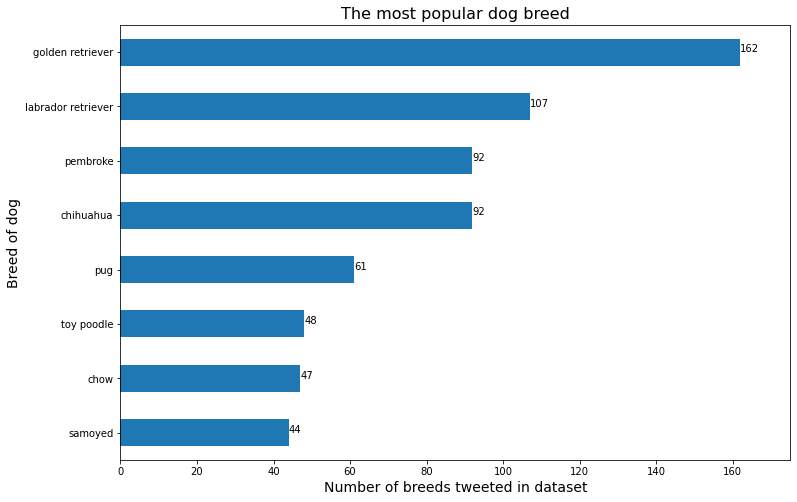

In [85]:
# grouping by breed_dog column and return the number of items in this grouped dataframe by dog breed 
popular_breed = df_twt.groupby('breed_dog').filter(lambda x: len(x) >= 40)

# plotting the value counting ascending of most popular dog breed
count_breed = popular_breed.breed_dog.value_counts(ascending = True)
count_breed.plot(kind = 'barh', figsize = [12, 8])

#display values for each bar
for index, value in enumerate(count_breed):
    plt.text(value, index, str(value))
    
plt.title('The most popular dog breed', fontsize = 16)
plt.xlabel('Number of breeds tweeted in dataset', fontsize = 14)
plt.ylabel('Breed of dog', fontsize = 14)
plt.xlim(0, 175) # limiting the X axis on 175 

# exporting the horizontal bar plot on png format 
plt.savefig('popular_breed.png', bbox_inches='tight');

> #### **As we can see, the most popular breed dog for @dog_rates page users is `Golden retriever`**

# ---------------------------------------------------------------------------------------
#### ***Insight two***

The dog breed get the most high retweet

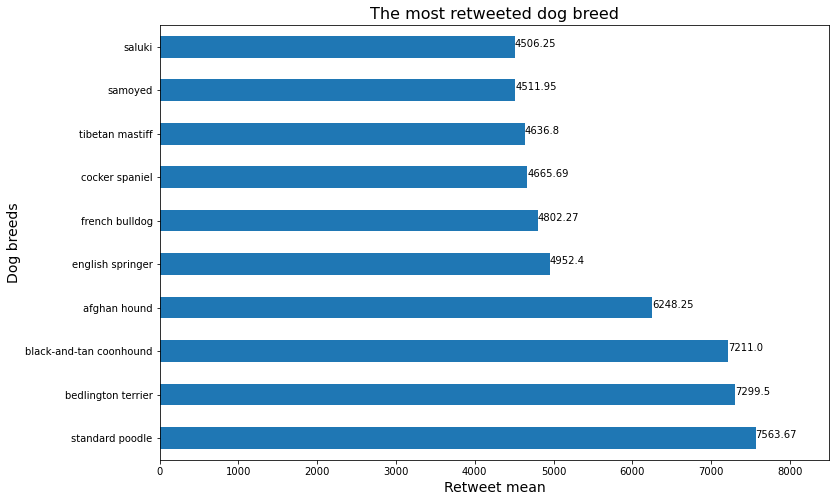

In [86]:
# choose the 10 hight retweeted breed dogs 
high_retweet = df_twt.groupby('breed_dog').retweet_count.mean().round(2).sort_values(ascending = False).iloc[:10]

# plotting the high retweeted breed
high_retweet.plot(kind='barh', figsize=[12, 8])

# adding the text values to each bar in chart 
for index, value in enumerate(high_retweet):
    plt.text(value, index, float(value))

plt.title('The most retweeted dog breed', fontsize = 16) 
plt.xlabel('Retweet mean', fontsize = 14)
plt.ylabel('Dog breeds', fontsize = 14)
plt.xlim(0, 8500) # limiting the X-axis on 8500 

# exporting the bar plot on png format 
plt.savefig('high_retweet_breed.png', bbox_inches='tight');

> #### **As we can see, the most retweeted breed dog for @dog_rates page users is `Standard poodle`**

# ---------------------------------------------------------------------------------------
#### ***Insight three***

The dog breed get the most high favorite counting

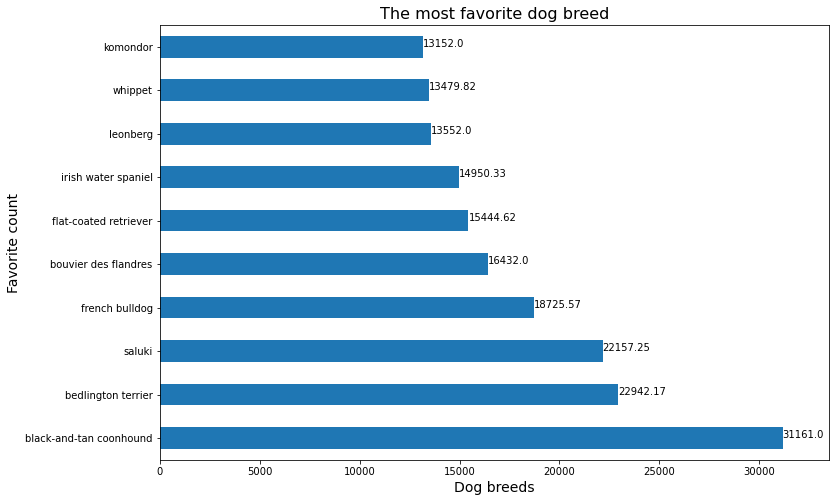

In [87]:
# choose the 10 hight favorited breed dogs 
high_favorite = df_twt.groupby('breed_dog').favorite_count.mean().round(2).sort_values(ascending = False).iloc[:10]

# plotting the high retweeted breed
high_favorite.plot(kind='barh', figsize=[12, 8])

# adding the text values to each bar in chart
for index, value in enumerate(high_favorite):
    plt.text(value, index, float(value))
    
    
plt.title('The most favorite dog breed', fontsize = 16)
plt.xlabel('Dog breeds', fontsize = 14)
plt.ylabel('Favorite count', fontsize = 14)
plt.xlim(0, 33500) # limiting the Y-axis on 33500 

# exporting the bar plot on png format 
plt.savefig('high_favorite_breed.png', bbox_inches='tight');

> #### **As we can see, the most favorited breed dog for @dog_rates page users is `Bedlington terrier`**

# ---------------------------------------------------------------------------------------
#### ***Insight four***

The correlation between favorite count and retweet count for breed dogs 

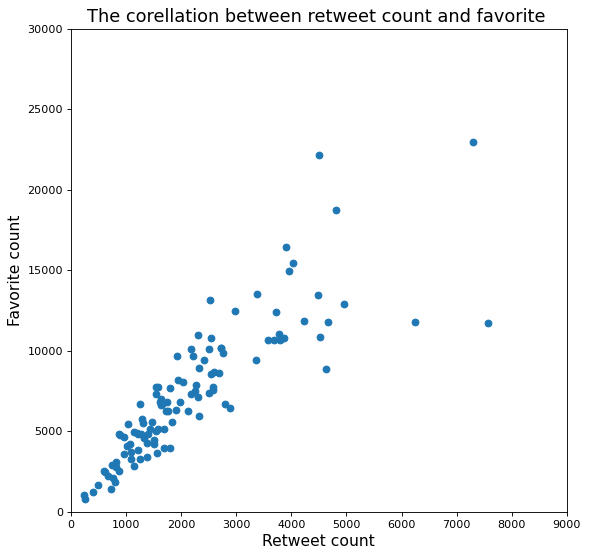

In [88]:
# getting the mean of retweet by breed dog 
high_retweet2 = df_twt.groupby('breed_dog').retweet_count.mean()

# getting the mean of favorite by breed dog 
high_favorite2 = df_twt.groupby('breed_dog').favorite_count.mean()

# set up the figure size of plotting 
plt.figure(figsize=(8, 8), dpi=80)

#plotting the scatter chart of two variables
plt.scatter(x=high_retweet2, y=high_favorite2)

plt.title('The corellation between retweet count and favorite ', fontsize = 16)
plt.xlabel('Retweet count', fontsize = 14)
plt.ylabel('Favorite count', fontsize = 14)
plt.xlim(0, 9000) # limiting the X axis on 9000 
plt.ylim(0, 30000) # limiting the  axis on 30000 

# exporting the bar plot on png format 
plt.savefig('retweet_favorite_correlation.png', bbox_inches='tight');

> #### **The favorite count and retweet count had a positive correlation for almost values, which is logical insight**

# ---------------------------------------------------------------------------------------
#### ***Insight five***

The most used rating for all tweets

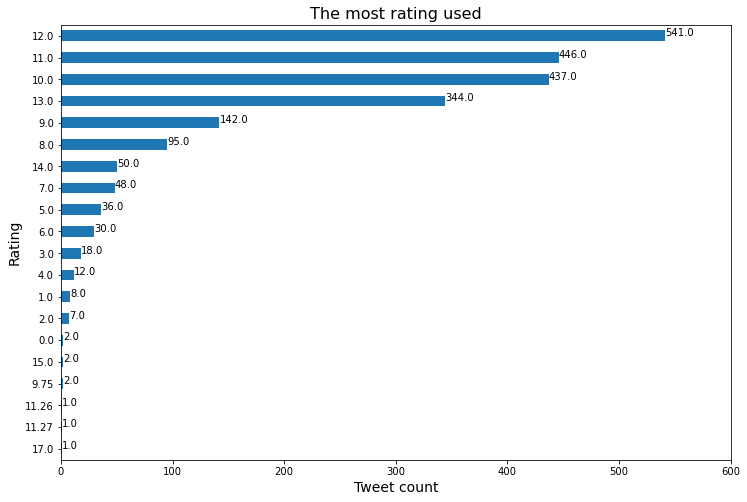

In [89]:
# get the rating count 
com_rate = df_twt.groupby('rating_numerator').tweet_id.count().sort_values(ascending=True)

com_rate.plot(kind='barh', figsize=[12, 8])

for index, value in enumerate(com_rate):
    plt.text(value, index, float(value))
    
plt.title('The most rating used', fontsize = 16)
plt.xlabel('Tweet count', fontsize = 14)
plt.ylabel('Rating', fontsize = 14)
plt.xlim(0, 600)# limiting the X-axis on 600

# exporting the bar plot on png format 
plt.savefig('most_used_rate.png', bbox_inches='tight');

> #### **For @dog_rates page users, the most used rating for breed dog is `12` followed by `11`and `10`, which mean almost of the users use a moderate rating**

# ---------------------------------------------------------------------------------------
#### ***Insight six***

Variation of tweet_id count, favorit_count, retweet_count values during the year

In [90]:
#Creation a data frame of tweet_id, favorite_count, retweet_count and months
num_twt = list(df_twt.groupby('tweet_month').tweet_id.count().values) #the number of tweet in each month 
fav_mean = list(df_twt.groupby('tweet_month').favorite_count.mean().values) #the mean of favorite count in each month 
retweet_mean = list(df_twt.groupby('tweet_month').retweet_count.mean().values) #the mean of retweet count in each month 
month = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
         'September', 'October', 'November', 'December'] 

df_month = pd.DataFrame({'month':month, 'num_twt':num_twt, 'fav_mean':fav_mean, 'retweet_mean':retweet_mean}) # preforming the creation of data frame
df_month.head(4)

,month,num_twt,fav_mean,retweet_mean
0,January,279,6743.139785,2884.620072
1,February,201,7505.025126,2504.386935
2,March,199,7730.432990,2467.520619
3,April,112,10323.563636,2788.727273


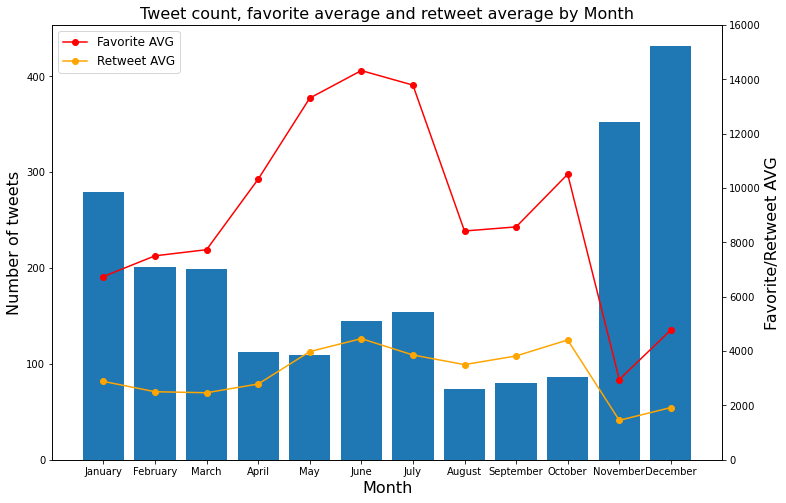

In [91]:
# create combo chart
fig, ax1 = plt.subplots(figsize=(12,8))

#bar plot creation
ax1.set_title('Tweet count, favorite average and retweet average by Month', fontsize=16)
ax1.set_xlabel('Month', fontsize=16)
ax1.set_ylabel('Number of tweets', fontsize=16)
ax1.bar(df_month.month, df_month.num_twt) #creating bar chart
ax1.tick_params(axis='y') #change the appearance of ticks, tick labels, and gridlines

#specify we want to share the same x-axis
ax2 = ax1.twinx()

#line plot creation
ax2.set_ylabel('Favorite/Retweet AVG', fontsize=16)
ax2.plot(df_month.month, df_month.fav_mean, color = 'red', marker='o', label = 'Favorite AVG') #creating line chart
ax2.plot(df_month.month, df_month.retweet_mean, color = 'orange', marker='o', label = 'Retweet AVG') #creating line chart
ax2.tick_params(axis='y')
plt.legend(loc='upper left', fontsize= 12)
plt.ylim(0, 16000) #limiting y-axis to 16000

# exporting the bar plot on png format 
plt.savefig('variation_month.png', bbox_inches='tight');

> #### **The `Number of tweets` of @dog_rates page users rise in novembre and december months, almost months the number of tweets is under 300 tweet for each month. But the `Favorite average` and `Retweet average` increase for almost the months and decrease for november and december even the number of tweets increase.**

# --------------------------------------------------------------------------------------
<a id="conclusion"></a> 
## **Conclusion**

This project is for data wrangling and data analysis for the @dog_rates Twitter account.

First, data gathering process resume three tasks, start by downloading TSV file, gathering data from twitter API and gathering data from json file. After creating data frames from the this sources and loading the given enhanced archive data frame  to Jupyter Notebook.

Second, using the data gathered, we assessed 20 issues in total and documented it for modifications. Later, in data cleaning process we fixed all identified issues by add some missing data and cleaning some structured issues also merged separated data frame into one. Finaly, stored data frame in twitter_archive_master.csv.

Third, the data analysis process, we interpreted the got data from cleaning data, we tried to get some insights, we found strong evidence of:

- The most polular, most retweeted and favorited breed dogs, we notice even a breed dog is most popular don't get bigger favorite and retweet acts;
- The correlation between favorited and retweeted counts it was positive, which is logic;
- The most breeds get a moderate rating between 10 and 12, which imply that the account users behavior is overdone the rating;
- During the year the tweet counts is moderate except the november and december, but for this two last month the favorite and retweet count is not in same tendency.


## **Sources**

- https://regexone.com/ , I used this website for all my extracting data work;
- https://www.geeksforgeeks.org/filter-in-python/ , to make a filter with some conditions using the lambda function;
- https://www.geeksforgeeks.org/matplotlib-axes-axes-twinx-in-python/ , for double ploting logic;